# INF552:Homework1 Yuxin Liu USC ID:2943825078

# Vertebral Column Data Set 
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classi cation task NO=0 and AB=1. 
  
  (a) Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data from csv to dataframe and add attributes' name
data = pd.read_csv('column_2C.csv', sep = ' ', header = None)
data.columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'class']
print (data)

     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
5               40.25        13.92                  25.12         26.33   
6               53.43        15.86                  37.17         37.57   
7               45.37        10.76                  29.04         34.61   
8               43.79        13.53                  42.69         30.26   
9               36.69         5.01                  41.95         31.68   
10              49.71        13.04                  31.33         36.67   
11              31.23        17.72                  15.50         13.52   
12              48.92    

  (b) Pre-Processing and Exploratory data analysis:   
   i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1. 

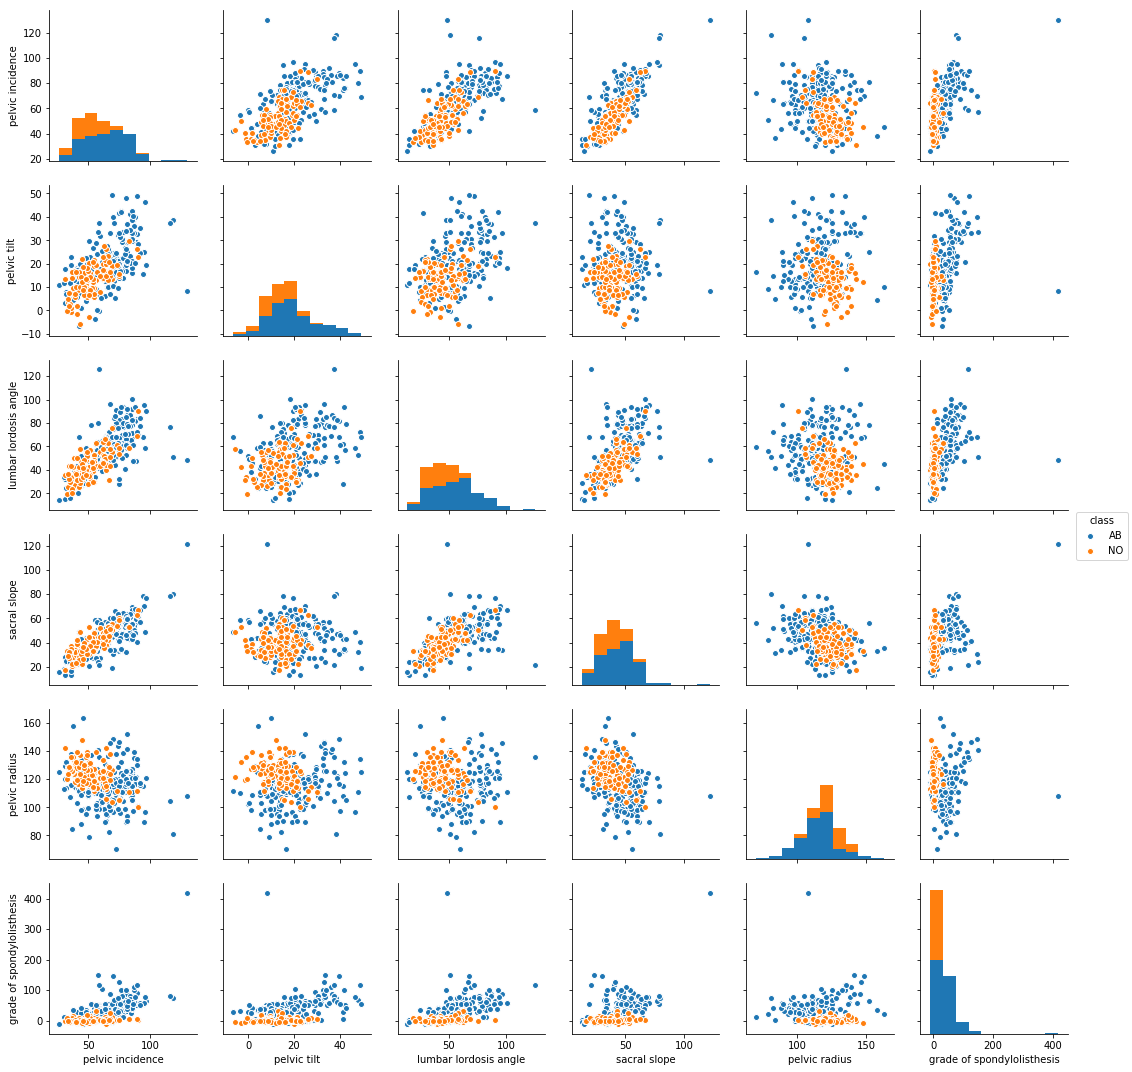

In [2]:
#b(i)
#pairplot， class "AB"(1) and "NO"(0) were shown in different colors
sns.pairplot(data, kind="scatter", hue="class")
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129). 

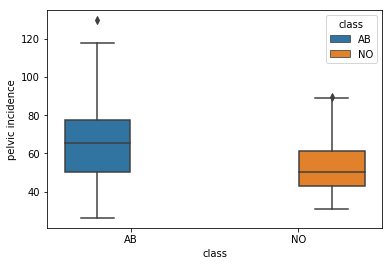

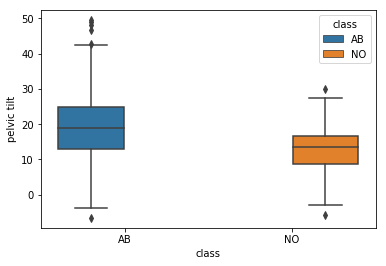

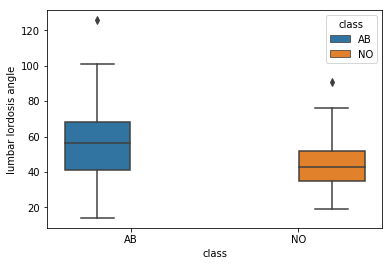

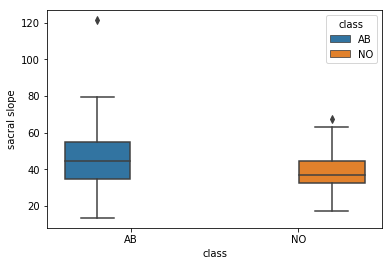

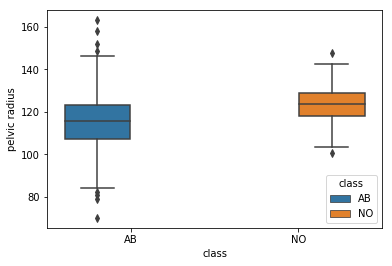

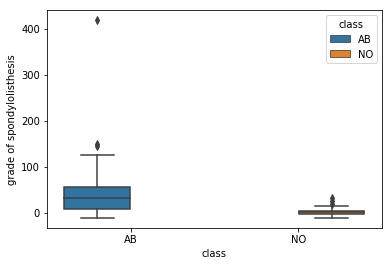

In [3]:
#b(ii)
#draw boxplots
df = data
sns.boxplot(data = df, x= "class", y = "pelvic incidence", hue = "class")
plt.show()
sns.boxplot(data = df, x= "class", y = "pelvic tilt", hue = "class")
plt.show()
sns.boxplot(data = df, x= "class", y = "lumbar lordosis angle", hue = "class")
plt.show()
sns.boxplot(data = df, x= "class", y = "sacral slope", hue = "class")
plt.show()
sns.boxplot(data = df, x= "class", y = "pelvic radius", hue = "class")
plt.show()
sns.boxplot(data = df, x= "class", y = "grade of spondylolisthesis", hue = "class")
plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set. 

In [16]:
#b(iii)divide training dataset and testing dataset

#replace AB and NO with 1 and 0
data.replace('AB', '1', inplace = True)
data.replace('NO', '0', inplace = True)

#divide dataset into data1 and data 0
data1 = data.loc[(data['class'] == '1')]
data0 = data.loc[(data['class'] == '0')]

#select the first 70 rows of data0 and 140 rows of data1
train_0 = data1.iloc[:140,:].append(data0.iloc[:70,:])
test_0 = data1.iloc[140:,:].append(data0.iloc[70:,:])

#divide dataset into training data and testing data by class names
test_0_X = test_0[['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis']]
train_0_X = train_0[['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis']]
test_0_Y = test_0[['class']]
train_0_Y = train_0[['class']]

print(type(train_0_Y))

<class 'pandas.core.frame.DataFrame'>


(c) Classi cation using KNN on Vertebral Column Data Set 

  i. Write code for k-nearest neighbors with Euclidean metric (or use a software package). 
  
  ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k of {208;205...7;4;1} (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k*.


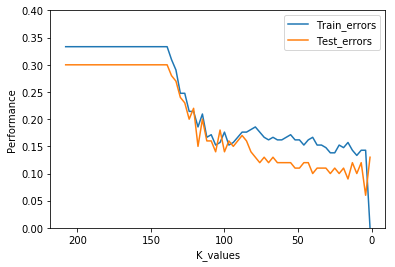

The best key of this knn model is 4.
The confusion matrix of the best k is:
[[25  5]
 [ 1 69]]


             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



In [5]:
#c(i)&c(ii)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#initial lists to store train errors and test errors
train_errors_c1 = list()
test_errors_c1 = list()

#initial lists to store k and dic to store k with test score
k_list_c1 = list()
k_performance_c1 = {}

#initial a list to store best train error of every model
train_error_collect_1=list()
train_error_collect=list()

#traverse k
for i in range(208,0,-3):
    k_list_c1.append(i)
    knn_c1 = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn_c1.fit(train_0_X, np.ravel(train_0_Y))
    train_errors_c1.append(1-knn_c1.score(train_0_X, train_0_Y))
    test_errors_c1.append(1-knn_c1.score(test_0_X, test_0_Y))
    k_performance_c1.update({i:1-knn_c1.score(test_0_X, test_0_Y)})
    
#plot train errors with test errors against k
plt.plot(k_list_c1, train_errors_c1, label='Train_errors')
plt.gca().invert_xaxis()
plt.plot(k_list_c1, test_errors_c1, label='Test_errors')
plt.legend(loc='upper right')
plt.ylim([0, 0.4])
plt.xlabel('K_values')
plt.ylabel('Performance')
plt.show()

#select the max test score as the best k(k*) and print
key_max_c1 = min(k_performance_c1.keys(), key=(lambda m: k_performance_c1[m]))
print('The best key of this knn model is %d.' %(key_max_c1))

#recalculate the knn model with k*
knn_c1_best = KNeighborsClassifier(n_neighbors = key_max_c1, metric = 'euclidean')
knn_c1_best.fit(train_0_X, np.ravel(train_0_Y))
predictions_c1 = knn_c1_best.predict(test_0_X)

#print confusion matrix
print('The confusion matrix of the best k is:')
print(confusion_matrix(test_0_Y, predictions_c1)) 
print('\n')

#print report which contains the TP and TN rate
print(classification_report(test_0_Y, predictions_c1)) 

#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
c1_shape = len(k_list_c1)
c1_1 = min(train_errors_c1)
c1 = min(train_errors_c1[0:c1_shape-1])
train_error_collect_1.append(c1_1)
train_error_collect.append(c1)

In [6]:
#from the chart we can conclude the following results
TP_c2 = 69
FP_c2 = 5
FN_c2 = 1
TN_c2 = 25
print('The true positive rate is ')
recall_c2 = (TP_c2/(TP_c2+FN_c2))
print(recall_c2)

print('The true negative rate is ' )
print(TN_c2/(TN_c2+FP_c2))
print('The precision rate')
precision_c2 = (TP_c2+TN_c2)/(TP_c2+TN_c2+FP_c2+FN_c2)
print(precision_c2)
print('The f-score for each class is ')
print(2*(precision_c2*recall_c2)/(precision_c2+recall_c2))

The true positive rate is 
0.9857142857142858
The true negative rate is 
0.8333333333333334
The precision rate
0.94
The f-score for each class is 
0.9623145400593472


  iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N of  {10;20;30;...;210}. 
  
  Note: for each N, select your training set by choosing the first [N/3]rows of Class 0 and the first N-[N/3] rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1;6;11;...;196}. This plot is called a Learning Curve. 

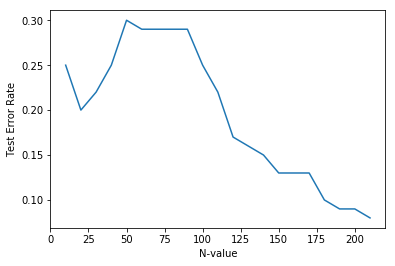

In [7]:
#c(iii)
import math

#initial dic to store N and best score
n_performance= {}
train_error_c3_1 = list()
train_error_c3 = list()
for i in range(0,21):
    
    #calculate N
    n=10*(i+1)
    
    #initial a list to store k range
    k_list=[]
    
    #select first N/3 rows of class0 and N-N/3 rows of class1 as the train dataset
    train_c3 = data1.iloc[:(n-math.floor(n/3)),:].append(data0.iloc[:math.floor(n/3),:])
    
    #divde in to X and Y
    train_c3_X = train_c3[['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis']]
    train_c3_Y = train_c3[['class']]
    
    #initial dic to store k and test error
    k_performance_c3 = {}
    for k in range(1,n,5):
        knn_c3 = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean',p=2)
        knn_c3.fit(train_c3_X, np.ravel(train_c3_Y))
        k_performance_c3.update({k:1-knn_c3.score(test_0_X, test_0_Y)})
        train_error_c3_1.append(1-knn_c3.score(train_c3_X, train_c3_Y))
        if (k!=1):
            train_error_c3.append(1-knn_c3.score(train_c3_X, train_c3_Y))
           
    #select k* of differnt N by test error 
    key_max_c3 = min(k_performance_c3.keys(), key=(lambda k: k_performance_c3[k]))
    knn_c31 = KNeighborsClassifier(n_neighbors=key_max_c3, metric = 'euclidean')
    knn_c31.fit(train_c3_X, np.ravel(train_c3_Y))
    n_errorrate = 1 - knn_c31.score(test_0_X, test_0_Y)
    n_performance.update({n:n_errorrate})

# sorted by key, return a list of tuples
lists = sorted(n_performance.items()) 

# unpack a list of pairs into two tuples
x, y = zip(*lists) 
plt.plot(x, y)
plt.xlabel('N-value')
plt.ylabel('Test Error Rate')
plt.show()

#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
c3_1 = min(train_error_c3_1)
train_error_collect_1.append(c3_1)
c3 = min(train_error_c3)
train_error_collect.append(c3)


(d) Replace the Euclidean metric with the following metrics and test them. Sum-marize the test errors (i.e., when k = k *) in a table. Use all of your training data and select the best k when {1;6;11;...;196}. 

  i. Minkowski Distance: 
  
  A. which becomes Manhattan Distance with p = 1. 

In [8]:
##d(i)A
import sys
from astropy.table import Table

#initial lists and dic
test_errors_dA = list()
k_list_dA = list()
k_performance_dA = {}

train_error_dA_1 = list()
train_error_dA = list()
for i in range(1,197,5):
    
    #store k in k_list_dA
    k_list_dA.append(i)
    knn_dA = KNeighborsClassifier(n_neighbors=i,p=1)
    knn_dA.fit(train_0_X, np.ravel(train_0_Y))
    
    ##store k and test error rate in to k_performance_dA
    k_performance_dA.update({i:1-knn_dA.score(test_0_X, test_0_Y)})
    train_error_dA_1.append(1-knn_dA.score(train_0_X, train_0_Y))
    if(i!=1):
        train_error_dA.append(1-knn_dA.score(train_0_X, train_0_Y))
        
#calculate the k*
key_max_dA = min(k_performance_dA.keys(), key=(lambda k: k_performance_dA[k]))

#plot table
keys = k_performance_dA.keys()
values = k_performance_dA.values()

t = Table([list(keys),list(values)],names = ('k-value','test error'))
print(t)
print('best key is')
print(key_max_dA)


#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
dA_1 = min(train_error_dA_1)
train_error_collect_1.append(dA_1)
dA = min(train_error_dA)
train_error_collect.append(dA)


k-value      test error    
------- -------------------
      1                0.12
      6 0.10999999999999999
     11 0.10999999999999999
     16                0.12
     21                0.12
     26 0.10999999999999999
     31                0.12
     36                0.13
     41                0.13
     46                0.13
    ...                 ...
    146 0.30000000000000004
    151 0.30000000000000004
    156 0.30000000000000004
    161 0.30000000000000004
    166 0.30000000000000004
    171 0.30000000000000004
    176 0.30000000000000004
    181 0.30000000000000004
    186 0.30000000000000004
    191 0.30000000000000004
    196 0.30000000000000004
Length = 40 rows
best key is
6


B. with log10(p)={0.1;0.2;0.3;...1}. In this case, use the k* you found for the Manhattan distance in 1(d)iA. What is the best log10(p)? 

In [9]:
##d(i)B
p_list = list()

train_error_dB = list()

#calculate p and store them into p_list
for n in np.arange(0.1,1.1,0.1):
    p_list.append(10**n)

#initial a list to store p and test error
p_performance = {}
for p_n in p_list:
    knn_dB= KNeighborsClassifier(n_neighbors=key_max_dA,p=p_n)
    knn_dB.fit(train_0_X, np.ravel(train_0_Y))
    p_performance.update({p_n:1-knn_dB.score(test_0_X, test_0_Y)})
    train_error_dB.append(1-knn_dB.score(train_0_X, train_0_Y))
    
p_max_dB = min(p_performance.keys(), key=(lambda k: p_performance[k]))
print('with log10(p)in {0:1;0:2;0:3...1},the best log10(p) is:' )
print(math.log10(p_max_dB))

#plot table
keys = p_performance.keys()
values = p_performance.values()

t_p = Table([list(keys),list(values)],names = ('p-value','test error'))
print(t_p)

#append best train error in train_error_collect and train_error_collect_1
dB = min(train_error_dB)
train_error_collect.append(dB)
train_error_collect_1.append(dB)

with log10(p)in {0:1;0:2;0:3...1},the best log10(p) is:
0.6
     p-value            test error    
------------------ -------------------
1.2589254117941673 0.08999999999999997
1.5848931924611136 0.08999999999999997
1.9952623149688797 0.07999999999999996
  2.51188643150958 0.07999999999999996
3.1622776601683795 0.07999999999999996
3.9810717055349722 0.06000000000000005
 5.011872336272724 0.06999999999999995
 6.309573444801933 0.07999999999999996
 7.943282347242816 0.08999999999999997
              10.0 0.08999999999999997


C. which becomes Chebyshev Distance with p ! 1 

In [10]:
#d(i)C
import sys
from astropy.table import Table

test_errors_dC = list()
k_list_dC = list()
k_performance_dC = {}
train_error_dC = list()
train_error_dC_1 = list()

for i in range(1,197,5):
    k_list_dC.append(i)
    knn_dC = KNeighborsClassifier(n_neighbors=i,metric='chebyshev')
    knn_dC.fit(train_0_X, np.ravel(train_0_Y))
    k_performance_dC.update({i:1-knn_dC.score(test_0_X, test_0_Y)})
    train_error_dC_1.append(1-knn_dC.score(train_0_X, train_0_Y))
    if(i!=1):
        train_error_dC.append(1-knn_dC.score(train_0_X, train_0_Y))
#store k and test error in dic
key_max_dC = min(k_performance_dC.keys(), key=(lambda k: k_performance_dC[k]))
keys_C = k_performance_dC.keys()
values_C = k_performance_dC.values()

#plot table
t_C = Table([list(keys_C),list(values_C)],names = ('k-value','test error'))
print(t_C)
print('best key is')
print(key_max_dC)

#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
dC_1 = min(train_error_dC_1)
train_error_collect_1.append(dC_1)
dC = min(train_error_dC)
train_error_collect.append(dC)

k-value      test error    
------- -------------------
      1                0.13
      6 0.08999999999999997
     11                0.12
     16 0.07999999999999996
     21 0.10999999999999999
     26                0.12
     31                0.12
     36 0.09999999999999998
     41                0.13
     46                0.12
    ...                 ...
    146 0.30000000000000004
    151 0.30000000000000004
    156 0.30000000000000004
    161 0.30000000000000004
    166 0.30000000000000004
    171 0.30000000000000004
    176 0.30000000000000004
    181 0.30000000000000004
    186 0.30000000000000004
    191 0.30000000000000004
    196 0.30000000000000004
Length = 40 rows
best key is
16


ii. Mahalanobis Distance. 

In [11]:
##d(ii) Mahalanobis
test_errors_d2 = list()
k_list_d2 = list()
k_performance_d2 = {}
train_error_d2 = list()
train_error_d2_1 = list()
for i in range(1,197,5):
    k_list_d2.append(i)
    
    #use mahalanobis distance 
    knn_d2 = KNeighborsClassifier(n_neighbors=i, algorithm = 'brute', metric ='mahalanobis', metric_params={'V': np.cov(train_0_X)})
    knn_d2.fit(train_0_X, np.ravel(train_0_Y))
    k_performance_d2.update({i:1-knn_d2.score(test_0_X, test_0_Y)})
    train_error_d2_1.append(1-knn_d2.score(train_0_X, train_0_Y))
    if(i!=1):
        train_error_d2.append(1-knn_d2.score(train_0_X, train_0_Y))

#select the k*
key_max_d2 = min(k_performance_d2.keys(), key=(lambda k: k_performance_d2[k]))

#plot table
keys_d2 = k_performance_d2.keys()
values_d2 = k_performance_d2.values()
t_d2 = Table([list(keys_d2),list(values_d2)],names = ('k-value','test error'))
print(t_d2)
print('best key is')
print(key_max_d2)

#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
d2 = min(train_error_d2)
train_error_collect.append(d2)
d2_1 = min(train_error_d2_1)
train_error_collect_1.append(d2_1)

k-value      test error    
------- -------------------
      1 0.18000000000000005
      6 0.16000000000000003
     11 0.18999999999999995
     16 0.19999999999999996
     21 0.22999999999999998
     26 0.20999999999999996
     31 0.20999999999999996
     36 0.22999999999999998
     41 0.22999999999999998
     46                0.24
    ...                 ...
    146 0.30000000000000004
    151 0.30000000000000004
    156 0.30000000000000004
    161 0.30000000000000004
    166 0.30000000000000004
    171 0.30000000000000004
    176 0.30000000000000004
    181 0.30000000000000004
    186 0.30000000000000004
    191 0.30000000000000004
    196 0.30000000000000004
Length = 40 rows
best key is
6


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater in uence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k from{1;6;11;16;...;196}. 

(i) Euclidean

In [12]:
##ee
import sys
from astropy.table import Table
test_errors_ee = list()
k_list_ee = list()
k_performance_ee = {}
train_error_ee = list()
train_error_ee_1 = list()
for i in range(1,197,5):
    k_list_ee.append(i)
    
    #change polling decision to distance
    knn_ee = KNeighborsClassifier(n_neighbors=i,metric='euclidean',weights ='distance')
    knn_ee.fit(train_0_X, np.ravel(train_0_Y))
    k_performance_ee.update({i:1-knn_ee.score(test_0_X, test_0_Y)})
    train_error_ee_1.append(1-knn_ee.score(train_0_X, train_0_Y))
    if(i!=1):
        train_error_ee.append(1-knn_ee.score(train_0_X, train_0_Y))
key_max_ee = min(k_performance_ee.keys(), key=(lambda k: k_performance_ee[k]))
keys_ee = k_performance_ee.keys()
values_ee = k_performance_ee.values()

#plot table
t_ee = Table([list(keys_ee),list(values_ee)],names = ('k-value','test error'))
print(t_ee)
print('best key is')
print(key_max_ee)

#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
ee = min(train_error_ee)
train_error_collect.append(ee)
ee_1 = min(train_error_ee_1)
train_error_collect_1.append(ee_1)


k-value      test error    
------- -------------------
      1                0.13
      6 0.09999999999999998
     11                0.12
     16 0.10999999999999999
     21 0.10999999999999999
     26 0.10999999999999999
     31 0.10999999999999999
     36 0.10999999999999999
     41 0.10999999999999999
     46 0.10999999999999999
    ...                 ...
    146 0.18999999999999995
    151 0.18999999999999995
    156 0.19999999999999996
    161 0.22999999999999998
    166                0.25
    171                0.27
    176                0.27
    181                0.27
    186                0.27
    191                0.28
    196                0.28
Length = 40 rows
best key is
6


(ii)Manhattan

In [13]:
##em
import sys
from astropy.table import Table

test_errors_em = list()
k_list_em = list()
k_performance_em = {}
train_error_em = list()
train_error_em_1 = list()
for i in range(1,197,5):
    k_list_em.append(i)
    knn_em = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights ='distance')
    knn_em.fit(train_0_X, np.ravel(train_0_Y))
    k_performance_em.update({i:1-knn_em.score(test_0_X, test_0_Y)})
    train_error_em_1.append(1-knn_em.score(train_0_X, train_0_Y))
    if (i!=1):
        train_error_em.append(1-knn_em.score(train_0_X, train_0_Y))
key_max_em = min(k_performance_em.keys(), key=(lambda k: k_performance_em[k]))
keys_em = k_performance_em.keys()
values_em = k_performance_em.values()

#plot table
t_em = Table([list(keys_em),list(values_em)],names = ('k-value','test error'))
print(t_em)
print('best key is')
print(key_max_em)

#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
em = min(train_error_em)
train_error_collect.append(em)
em_1 = min(train_error_em_1)
train_error_collect_1.append(em_1)

k-value      test error    
------- -------------------
      1                0.12
      6 0.10999999999999999
     11 0.10999999999999999
     16                0.12
     21 0.10999999999999999
     26 0.09999999999999998
     31 0.10999999999999999
     36 0.10999999999999999
     41 0.10999999999999999
     46 0.10999999999999999
    ...                 ...
    146 0.18000000000000005
    151 0.18999999999999995
    156 0.20999999999999996
    161                0.24
    166                0.25
    171                0.27
    176                0.27
    181                0.27
    186                0.27
    191                0.28
    196 0.29000000000000004
Length = 40 rows
best key is
26


(iii)Chebyshev

In [14]:
##ec
import sys
from astropy.table import Table

test_errors_ec = list()
k_list_ec = list()
k_performance_ec = {}
train_error_ec = list()
train_error_ec_1 = list()

for i in range(1,197,5):
    k_list_ec.append(i)
    knn_ec = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights ='distance')
    knn_ec.fit(train_0_X, np.ravel(train_0_Y))
    k_performance_ec.update({i:1-knn_ec.score(test_0_X, test_0_Y)})
    train_error_ec_1.append(1-knn_ec.score(train_0_X, train_0_Y))
    if(i!=1):
        train_error_ec.append(1-knn_ec.score(train_0_X, train_0_Y))
key_max_ec = min(k_performance_ec.keys(), key=(lambda k: k_performance_ec[k]))

keys_ec = k_performance_ec.keys()
values_ec = k_performance_ec.values()

#plot table
t_ec = Table([list(keys_ec),list(values_ec)],names = ('k-value','test error'))
print(t_ec)
print('best key is')
print(key_max_ec)

#append best train error(k=1 included) in train_error_collect_c1
#append best train error(k!=1) in train_error_collect
ec = min(train_error_ec)
train_error_collect.append(ec)
ec_1 = min(train_error_ec_1)
train_error_collect_1.append(ec_1)

k-value      test error    
------- -------------------
      1                0.13
      6                0.13
     11                0.12
     16 0.10999999999999999
     21                0.12
     26                0.12
     31 0.10999999999999999
     36 0.10999999999999999
     41 0.10999999999999999
     46                0.12
    ...                 ...
    146 0.18999999999999995
    151 0.20999999999999996
    156 0.20999999999999996
    161 0.22999999999999998
    166                0.26
    171                0.26
    176                0.26
    181                0.27
    186                0.27
    191                0.27
    196                0.28
Length = 40 rows
best key is
16


(f) What is the lowest training error rate you achieved in this exercise? 

In [15]:
#select the min of train_error_collect which includes all best error rate from all models in this exercise
print('The lowest training error rate is %d if k=1 was included' %min(train_error_collect_1))
print('The lowest training error rate is %d' %min(train_error_collect))
#print(train_error_collect)
l=min(train_error_collect[0:6])
print('When we exclude all the 0 training error rate, the lowest training error rate is ')
print(l)


The lowest training error rate is 0 if k=1 was included
The lowest training error rate is 0
When we exclude all the 0 training error rate, the lowest training error rate is 
0.09999999999999998


In some models, when k=1 the model will be overfitting. If we include this condition when caculating the train error rate, the best train error is 0.
However, when we exclude the overfitting condition, we got best train error also is 0. 
When we exclude all the results which are 0, the best training error rate is 0.099999.